# Final Assignment - Intro to AI and Machine Learning M505A
### Adolfo Mier y Teran Ruschke - GH1020379

### Introduction
I am a newly appointed Data Scientist working for the company "Sweet Airlines", and I have been given the task of building an End-to-End Supervised Machine Learning pipeline that will predict the customers' satisfaction opinion of the service provided by the airline.

The Machine Learning pipeline will follow the following structure:

1. Business problem understanding
2. Data collection
3. Data exploration
4. Data preprocessing
5. Feauture engineering
6. Model training
7. Model assessment
8. Insights and conclusions

### Bibliography
The dataset that is going to be used for this task is a public dataset in Kaggle that can be found under the description: Airline Passenger Satisfaction, What factors lead to customer satisfaction for an Airline?

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?resource=download

No copyright infringement intended.

### Libraries

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection #Split into traing and test set
from sklearn.compose import ColumnTransformer #Colum Transformer for One Hot Encoding and Standarization
from sklearn.preprocessing import StandardScaler #Standard scaler for Column transformer
from sklearn.preprocessing import OneHotEncoder #One Hot Encoder for Column transformer
from sklearn.model_selection import GridSearchCV #Grid search for model selection
from sklearn.svm import SVC #Support Vector Machines model
from sklearn.neighbors import KNeighborsClassifier #KNN model
from sklearn.tree import DecisionTreeClassifier #Decision Tree model
from sklearn.metrics import accuracy_score #Accuracy score metric
from sklearn.metrics import confusion_matrix #Confusion matrix metric
from sklearn.metrics import classification_report #Precision, recall and F-score
from IPython import display #Display images

### 1. Business problem understanding
The airline "Sweet Airlines" has collected data from a survey from more than 120,000 passengers on which they rate the overall service provided, as well as certain individual aspects of the service. They understand that the best way to grow and compete in a crowded and volatile market is to provide the best customer service within their capabilities.

In order to do that they aim to understand what are the aspects of the service that influence the most on the overall customers' perception, to focus their efforts on improving them in an intelligent fashion.

The objective of the Machine Learning Model is to predict beforehand what would be the customers' perception given certain attributes of the service, and be able to improve on them to gain a better overall customer experience, and grow as a business. 

### 2. Data collection
The available data is divided into two datasets (train and test) which are available on the referred website. For the purpose of this excercise we will consolidate them into a single dataset, and after we will divide them again into training and test sets.

In [155]:
#Load both datasets
original_train = pd.read_csv('/Users/adolfomytr/Documents/Alemania/Master/GISMA/Materias/intro_machine_learning/Final assignment/train.csv')
original_test = pd.read_csv('/Users/adolfomytr/Documents/Alemania/Master/GISMA/Materias/intro_machine_learning/Final assignment/test.csv')

#Concatenate both datasets into a single one
flights_df = pd.concat([original_train, original_test], ignore_index=True)
flights_df = flights_df.drop('Unnamed: 0', axis=1).set_index('id')
flights_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [156]:
#Split the data into training and test sets
flights_train, flights_test = sklearn.model_selection.train_test_split(flights_df)
print('flights_train', flights_train.shape)
print('flights_test', flights_test.shape)

flights_train (97410, 23)
flights_test (32470, 23)


### 3. Data exploration

3.1. We perform an exploration at a glance of the available numerical data and their summary statistics

In [157]:
flights_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,97410.0,39.445488,15.102789,7.0,27.0,40.0,51.0,85.0
Flight Distance,97410.0,1192.491746,999.757347,31.0,414.0,845.0,1744.0,4983.0
Inflight wifi service,97410.0,2.726989,1.330489,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,97410.0,3.057910,1.527386,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,97410.0,2.754019,1.403279,0.0,2.0,3.0,4.0,5.0
Gate location,97410.0,2.974941,1.279418,0.0,2.0,3.0,4.0,5.0
Food and drink,97410.0,3.206899,1.328190,0.0,2.0,3.0,4.0,5.0
Online boarding,97410.0,3.252243,1.352656,0.0,2.0,3.0,4.0,5.0
Seat comfort,97410.0,3.440756,1.318448,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,97410.0,3.356637,1.334345,0.0,2.0,4.0,4.0,5.0


3.2. We check if there are any explicit missing values on the dataset

In [158]:
flights_train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             297
satisfaction                           0
dtype: int64

3.3. We check if there are any implicit missing values in the dataset using histograms to overview in a quick way the distribution of the values from the feauture vectors

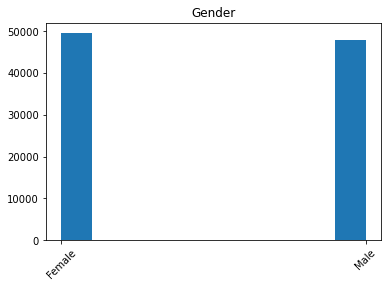

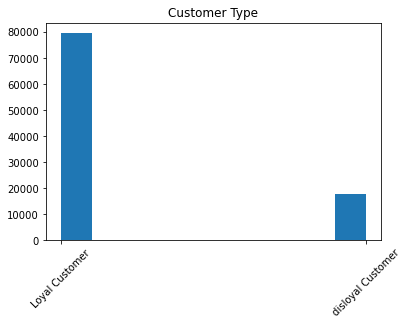

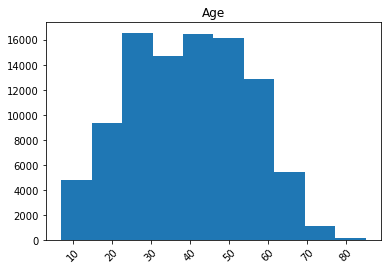

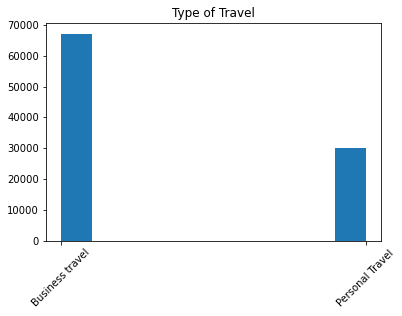

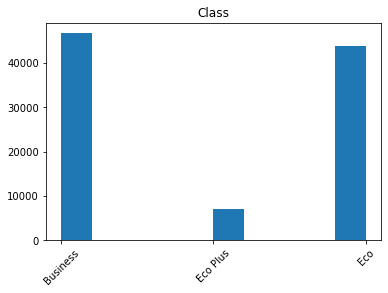

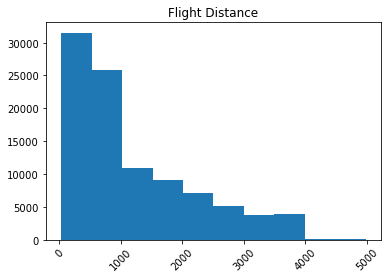

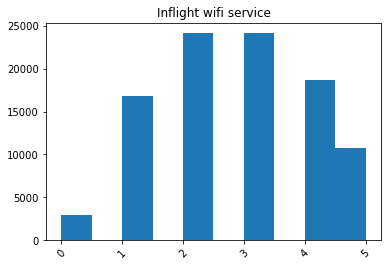

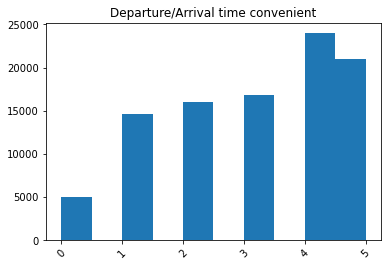

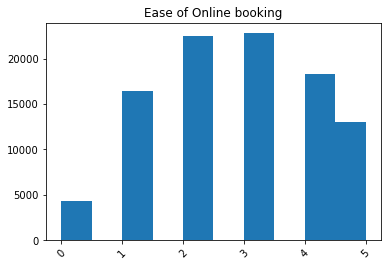

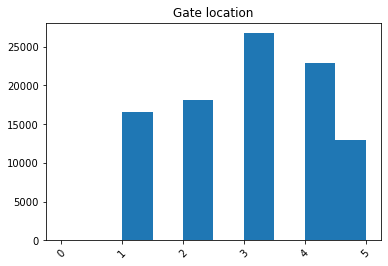

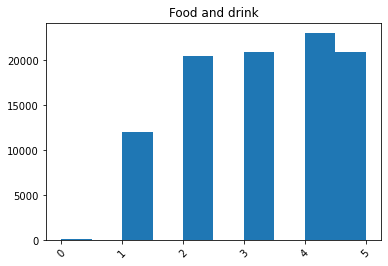

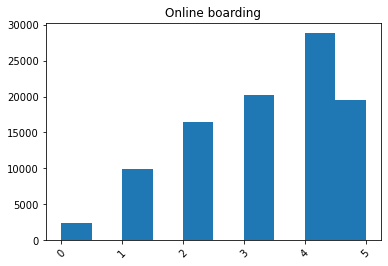

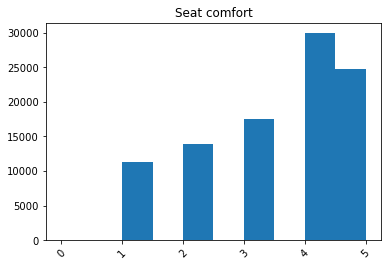

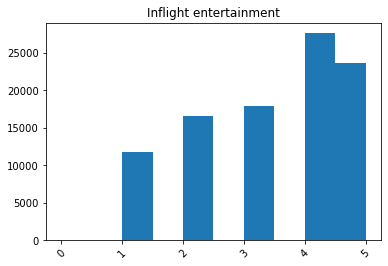

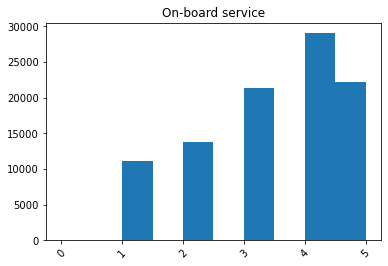

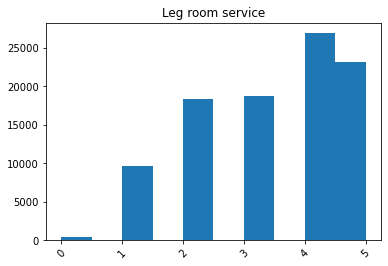

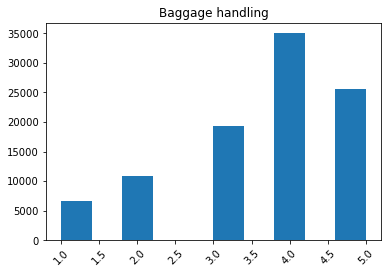

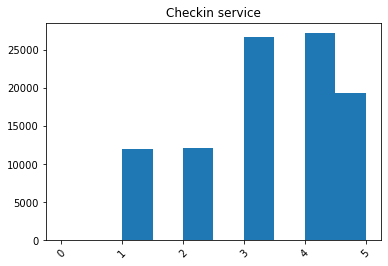

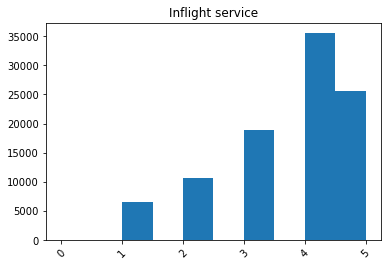

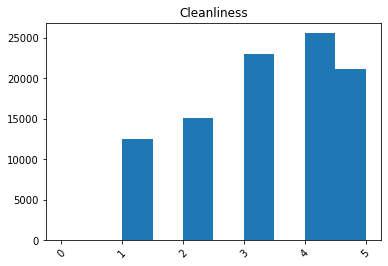

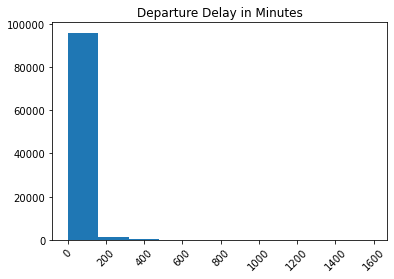

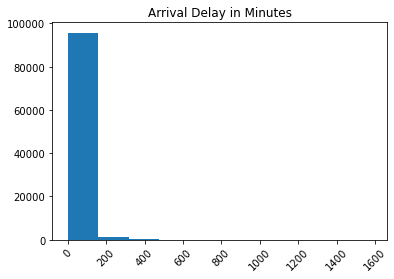

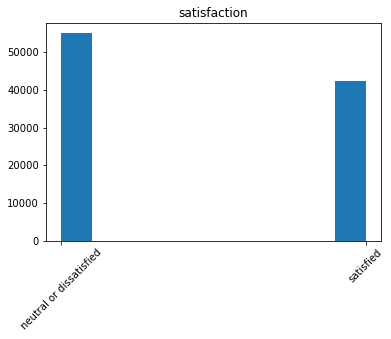

In [159]:
for col_name in flights_train.columns:
    plt.hist(flights_train[col_name])
    plt.title(col_name)
    plt.xticks(rotation=45)
    plt.show()

3.4. We check the balance of the target label in case we need to balance the data

In [160]:
flights_train['satisfaction'].value_counts(normalize=True)
#It is a little imbalanced, but it is not very representative so we wont apply the balancing technique

neutral or dissatisfied    0.564788
satisfied                  0.435212
Name: satisfaction, dtype: float64

### 4. Data preprocessing

From the previous data exploration we have found that there are some missing explicit values for the feauture "Arrival Delay in Minutes". We will proceed to drop the rows of the train and test set which contains those missing values. There are no missing implicit values.

In [161]:
flights_train = flights_train.dropna()
flights_test = flights_test.dropna()

print('flights_train', flights_train.shape)
print('flights_test', flights_test.shape)

flights_train (97113, 23)
flights_test (32374, 23)


### 5. Feauture engineering
Given that we have both categorical and numerical variables, we will use One Hot Encoding and Standarization techniques to convert the feauture vectors to provide a higher accuracy to the model.

5.1. Separate the feauture vectors from the target labels in both train and test datasets

In [162]:
x_train = flights_train.drop(['satisfaction'], axis=1)
y_train = flights_train['satisfaction']

x_test = flights_test.drop(['satisfaction'], axis=1)
y_test = flights_test['satisfaction']

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (97113, 22)
y_train (97113,)
x_test (32374, 22)
y_test (32374,)


5.2. We use ColumnTransfer object to enconde (categorical) and standarize (numerical) feauture vectors in a single step, diferentiating them to provide a higher accuracy in the model

In [163]:
#Create a Column Transformer Object
ct = ColumnTransformer(transformers=[
                                    ('cat', OneHotEncoder(), ['Gender', 'Customer Type', 'Type of Travel', 'Class']),
                                    ('num', StandardScaler(), ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'])
                                    ])

x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (97113, 27)
y_train (97113,)
x_test (32374, 27)
y_test (32374,)


5.3. We won't reduce the dimension of the dataset since the number of feauture vectors is not two big (27) after conding the variables.

### 6. Model training
6.1. We would use the Grid Search technique to try 3 different models and assess which one is better. We try out SVM, KNN and Decision Tree.
Unfortunately, the code that follows takes too much time to run (>60 min) and that is the reason we have commented it. 

6.1.1. Define a grid for the 3 selected ML models

In [164]:
#svm_grid = {'C':[0.01, 0.1, 1, 10], 'kernel':['linear', 'poly', 'rbf']}
#knn_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7], 'p':[1, 2]}
#dt_grid = {'criterion':['gini', 'entropy', 'log_loss'], 'max_depth': [3, 4, 5, 6, 7, 8, 9]}

6.1.2. Conduct the grid search to find the best model

In [165]:
#grid_search_svm = GridSearchCV(SVC(), svm_grid, cv=5, error_score='raise')
#grid_seach_knn = GridSearchCV(KNeighborsClassifier(), knn_grid, cv=5, error_score='raise')
#grid_seach_dt = GridSearchCV(DecisionTreeClassifier(), dt_grid, cv=5, error_score='raise')

6.1.3. Fit the training set into each grid search

In [166]:
#grid_search_svm.fit(x_train, y_train)
#grid_seach_knn.fit(x_train, y_train)
#grid_seach_dt.fit(x_train, y_train)

6.1.4. Evaluate the best metrics from the models

In [167]:
#print('best_score SVM', grid_search_svm.best_score_)
#print('best_params SVM', grid_search_svm.best_params_)
#print('best_estimator SVM', grid_search_svm.best_estimator_)
#print('')
#print('best_score KNN', grid_search_knn.best_score_)
#print('best_params KNN', grid_search_knn.best_params_)
#print('best_estimator KNN', grid_search_knn.best_estimator_)
#print('')
#print('best_score DT', grid_search_dt.best_score_)
#print('best_params DT', grid_search_dt.best_params_)
#print('best_estimator DT', grid_search_dt.best_estimator_)

6.2. Train the model with different algorithms and choose the one with the highes accuracy

In [168]:
#The KNN algorithm was the one that showed the highes accuracy using 6 neighbors and p=1, between SVM and Decision Trees
model = KNeighborsClassifier(n_neighbors=6, p=1)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6, p=1)

### 7. Model assessment

7.1. Assess the model using accuracy score

In [169]:
y_predicted = model.predict(x_test)
accuracy = accuracy_score(y_test, y_predicted)
print(round(accuracy, 2))

0.93


7.2. Assess the model using a Confusion Matrix

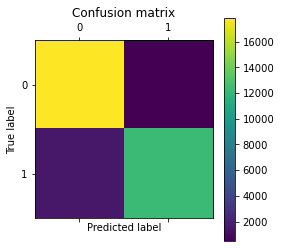

,0,1
0,17880,502
1,1629,12363


In [170]:
cm = sklearn.metrics.confusion_matrix(y_test, y_predicted)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

pd.DataFrame(confusion_matrix(y_test, y_predicted))

7.3. Assess the model using Precision, Recall and F-score

In [171]:
class_report = classification_report(y_test, y_predicted)
print(class_report)

                         precision    recall  f1-score   support

neutral or dissatisfied       0.92      0.97      0.94     18382
              satisfied       0.96      0.88      0.92     13992

               accuracy                           0.93     32374
              macro avg       0.94      0.93      0.93     32374
           weighted avg       0.94      0.93      0.93     32374



### 8. Insights and conclusions
We developed a K-Nearest Neighbors algorithm to predict the target label of the data. After initially analyzing the data, cleaning it and developing feauture engineering techniques, we fitted the model into the KNN algorithm choosing 6 neighbors since it was the number that showed the highes accuracy score.

We also used a Confusion Matrix to visualize the predicted labels vs the real labels from the test set, and it showed us how well the model performed in a more visual way.

Furthermore, we evaluated the results with a classification report showing the precision, recall and f1-score of the predicted data. We see that the precision scores are high for both labels, and the recall is a little less high for the satisfied level. We usually don't have a high precision and recall together, although these are very good scores.

In conclusion, we can use this model to predict whether "Sweet Airlines" would receive a "Satisfied" or "Neutral or Dissatisfied" perception from the customers given the different attributes evaluated in this survey with a 94% accuracy. This will help them get ahead and focus their efforts on improving the different services they have, in order to ensure receiving a positive review from their customers

### Submission Form

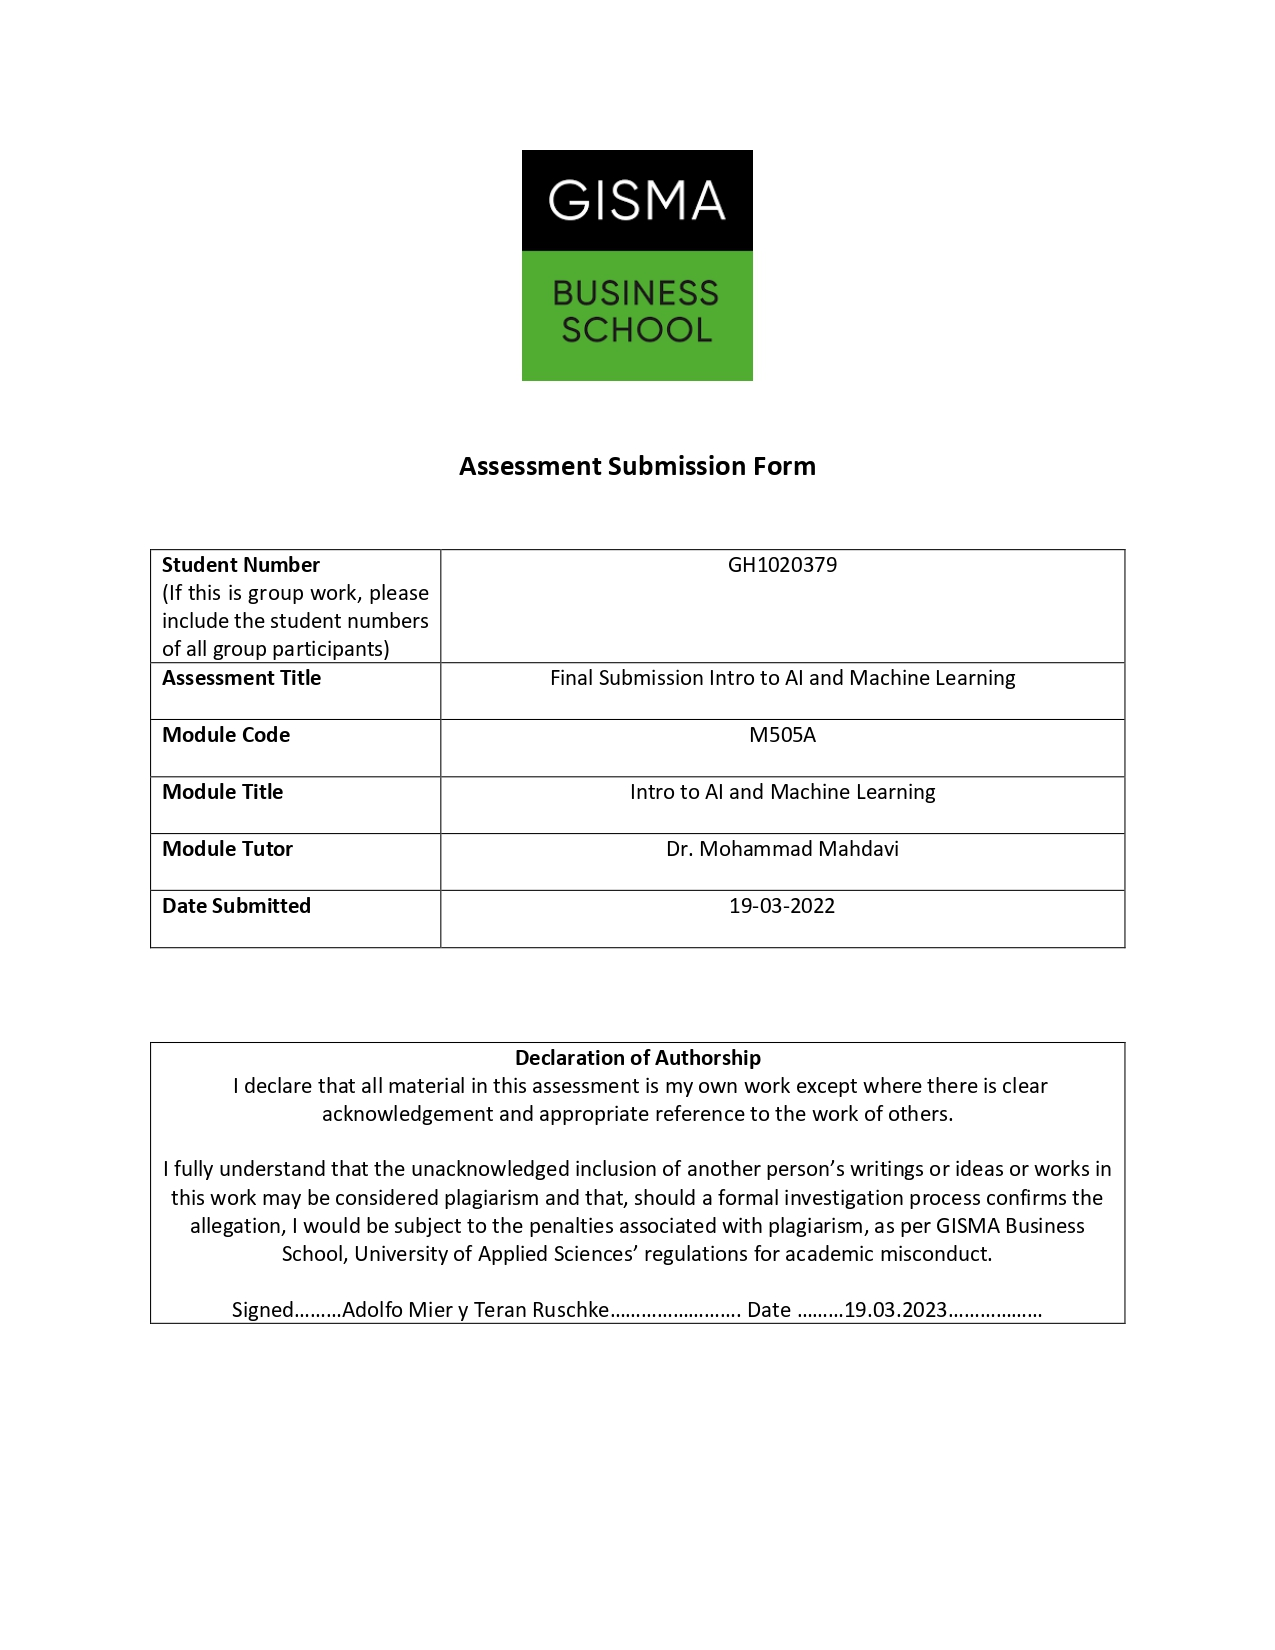

In [172]:
display.Image("/Users/adolfomytr/Documents/Alemania/Master/GISMA/Materias/intro_machine_learning/Final assignment/Assessment Submission Form_page-0001.jpg", width=500, height= 650)

In [173]:
!jupyter nbconvert --to html final_assignment_ml.ipynb

[NbConvertApp] Converting notebook final_assignment_ml.ipynb to html
[NbConvertApp] Writing 1298512 bytes to final_assignment_ml.html
